In [1]:
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'
# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [22]:
platform.system()

'Darwin'

In [2]:
# 데이터 디렉토리 파일 확인
import os
print(os.listdir("../input"))

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'train_sentiment', 'train', 'train_images', 'state_labels.csv']


In [3]:
# train, test 데이터 read(dataframe)
train = pd.read_csv('../input/train/train.csv')
test = pd.read_csv('../input/test/test.csv')

In [4]:
# train 데이터 행과 열의 개수
train.shape

(14993, 24)

In [5]:
# test 데이터 행과 열의 개수, train데이터보다 하나 적다. 예측해야 하는 입양속도 AdoptionSpeed 빠졌음.
test.shape

(3948, 23)

In [6]:
# train 데이터 인덱스
train.index

RangeIndex(start=0, stop=14993, step=1)

In [7]:
# train 데이터 칼럼
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [23]:
test.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt'],
      dtype='object')

### 일변량(Uni-variate) 질적 자료의 분석
* 표
  * 빈도
  * 백분율
* 그래프
  * 막대그래프
  * 원그래프

In [25]:
train.AdoptionSpeed.value_counts().sort_index()

0     410
1    3090
2    4037
3    3259
4    4197
Name: AdoptionSpeed, dtype: int64

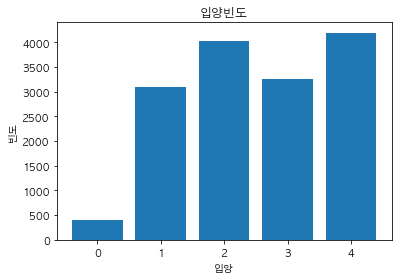

In [24]:
frequency = train.AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

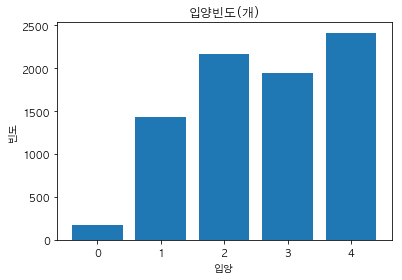

In [30]:
# 개만 입양 빈도
frequency = train.loc[train.Type == 1, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(개)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

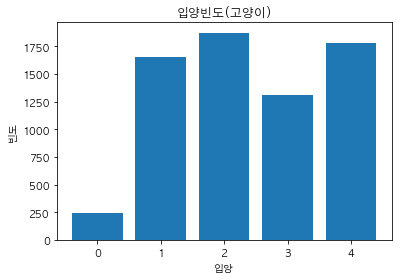

In [29]:
# 고양이만 입양 빈도
frequency = train.loc[train.Type == 2, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(고양이)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

In [9]:
train.Type.value_counts()

1    8132
2    6861
Name: Type, dtype: int64

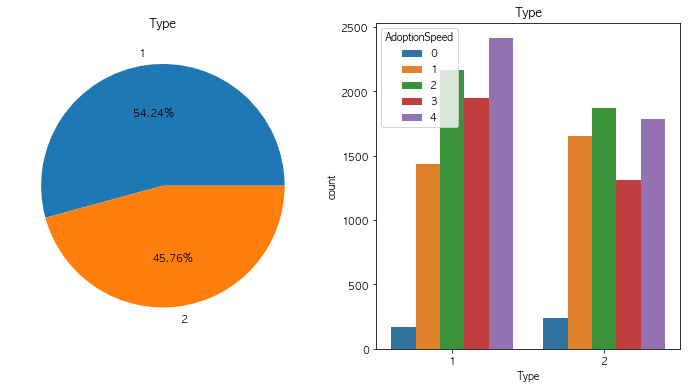

In [11]:
# 개, 고양이 기준 입양 분석
# feature값으로 사용하기로 결정

column_name = "Type"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

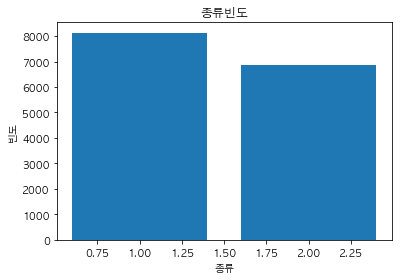

In [37]:
frequency = train.Type.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("종류빈도")
plt.xlabel("종류")
plt.ylabel("빈도")
plt.show()

In [ ]:
# 개, 고양이 기준 입양 분석
# feature값으로 사용하기로 결정

column_name = "Type"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [12]:
# 나이 기준 입양 분석
# 최소/최대 나이 확인
age_min = train.Age.min()
age_max = train.Age.max()
print("age_min : ", age_min)
print("age_max : ", age_max)

age_min :  0
age_max :  255


In [21]:
train.loc[train.Age == 255, :]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_group
5160,1,Happy-FIFI,255,307,0,1,2,7,0,2,...,1,0,41330,94fdeec413a441bca0de9e9887edcc70,0,very suitable to be a guard. easy handle. :) c...,5971c2462,3.0,4,"[240, 260)"
11172,1,FiFi,255,307,0,1,2,7,0,2,...,1,0,41330,94fdeec413a441bca0de9e9887edcc70,0,very suitable to be a guard. easy handle. :) c...,50682d0f1,1.0,4,"[240, 260)"


In [13]:
train["age_group"] = pd.cut(train.Age,
                                bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 260],
                                right = False)

In [44]:
train["age_group2"] = pd.cut(train.Age,
                                bins = [0, 3, 6, 9, 12, 50, 90, 120, 150, 180, 210, 240, 260],
                                right = False)

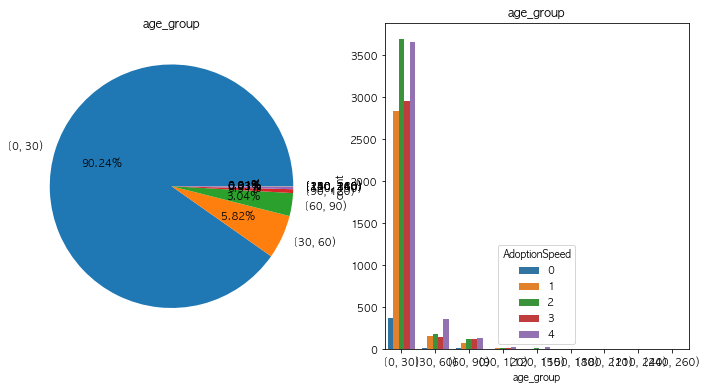

In [14]:
column_name = "age_group"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

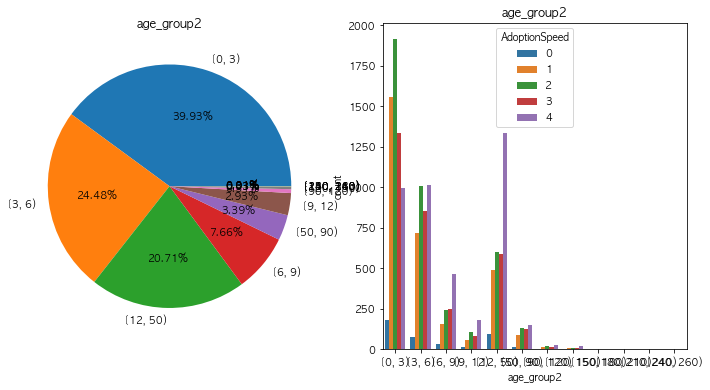

In [45]:
column_name = "age_group2"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [31]:
train.age_group.value_counts().sort_index()

[0, 30)       13530
[30, 60)        872
[60, 90)        456
[90, 120)        76
[120, 150)       49
[150, 180)        2
[180, 210)        2
[210, 240)        4
[240, 260)        2
Name: age_group, dtype: int64

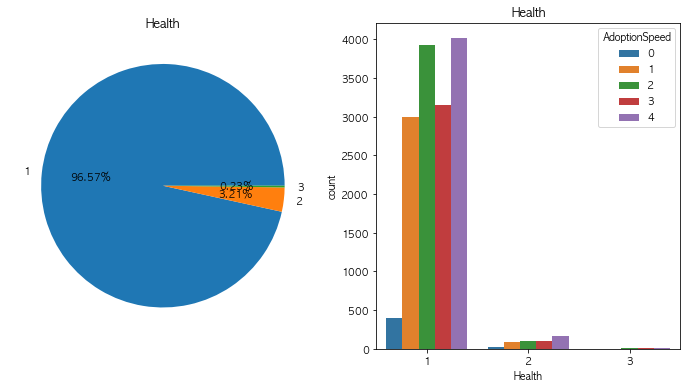

In [33]:
column_name = "Health"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [34]:
train.Health.value_counts().sort_index()

1    14478
2      481
3       34
Name: Health, dtype: int64

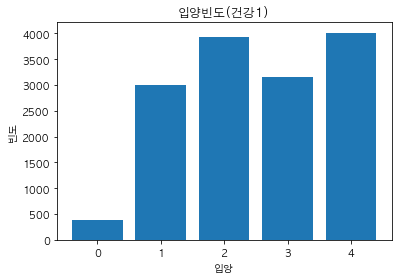

In [36]:
# 건강 상태에 따른 입양
frequency = train.loc[train.Health == 1, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강1)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

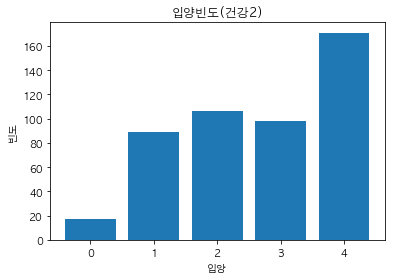

In [37]:
# 건강 상태에 따른 입양
frequency = train.loc[train.Health == 2, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강2)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

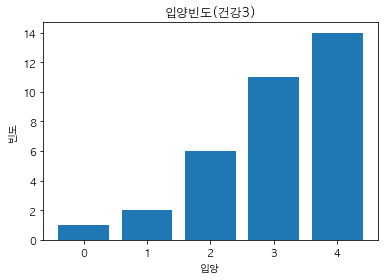

In [38]:
# 건강 상태에 따른 입양
frequency = train.loc[train.Health == 3, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

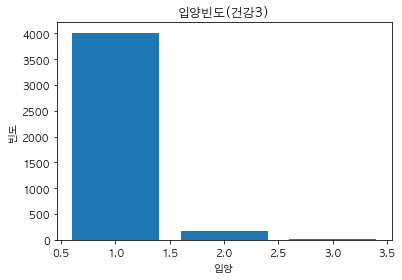

In [39]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 4, :].Health.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

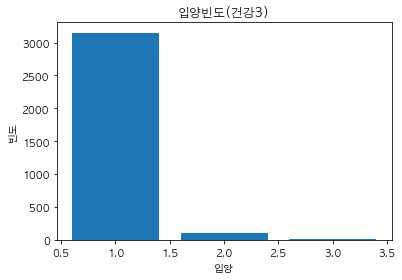

In [40]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 3, :].Health.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

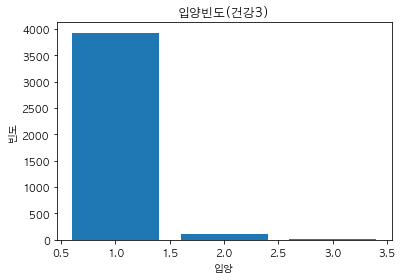

In [41]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 2, :].Health.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

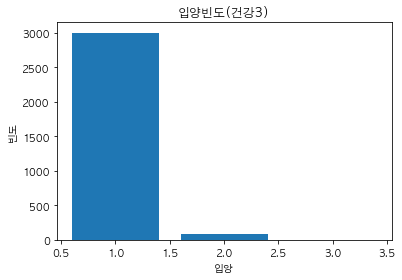

In [42]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 1, :].Health.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

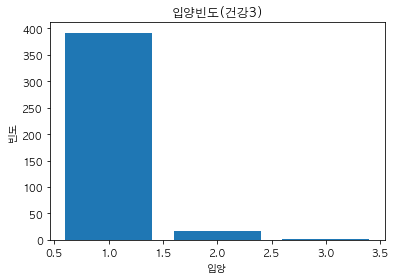

In [43]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 0, :].Health.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

In [46]:
# 나이, 성별, 종, 사진, 이미지, 구조장소


In [50]:
frequency = train.RescuerID.value_counts(ascending=False) # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

KeyboardInterrupt: 

In [49]:
train.RescuerID.value_counts(ascending=False)

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
95481e953f8aed9ec3d16fc4509537e8    134
b770bac0ca797cf1433c48a35d30c4cb    111
a042471e0f43f2cf707104a1a138a7df     95
fd970cc91d06d82eebf046340137b272     93
7ed6d84e2e6879245e55447aee39c328     85
e62135526c27156b8479420aad166317     77
438a9bdce8ef4d5948fc40e422d34d0d     75
8b6c5cd067ada5f54ca5ffc7f7b5d896     74
cccb18b8f8b81862f9a1ebc65d651d22     65
001e42763024f9d4abe31e79472b1827     61
530f57b53cb3199e1d5e67733ddc0876     60
3b074cadd2350de62dca7056b9bab6f4     59
3223e1c4cb2bef48823ee5c604b9aa04     52
db784cbcf321e1d8856b312638b94113     52
9238e4f44c71a75282e62f7136c6b240     50
7b107e61f7d24a581e46e0abc4d2a7a7     48
78ec79634d350f6850fdd4a335cab431     47
f45d8c72a87f27427cd28fc3cd2d7ce3     46
88a21c30883ab70a93e09035e0a9a754     44
2e53c8cd2454a77eb195a039ee28b8f6     44


In [51]:
train.PhotoAmt.value_counts(ascending=False)

1.0     3075
2.0     2518
3.0     2511
5.0     2147
4.0     1881
6.0      621
7.0      432
0.0      341
8.0      314
9.0      231
10.0     190
11.0     184
12.0      97
13.0      86
14.0      78
15.0      50
16.0      39
17.0      27
20.0      25
19.0      20
30.0      19
18.0      18
21.0      16
24.0      15
23.0      12
26.0      10
22.0       9
25.0       8
28.0       7
27.0       6
29.0       6
Name: PhotoAmt, dtype: int64

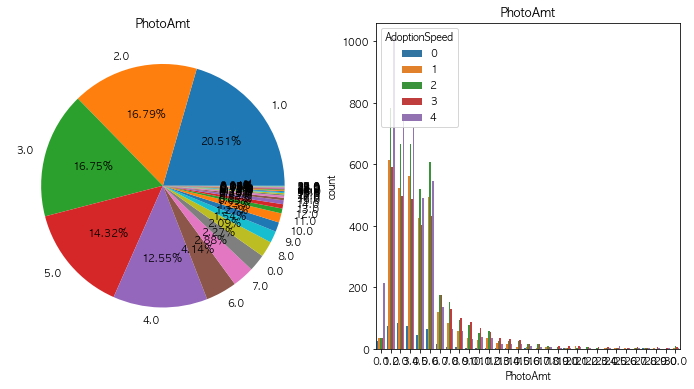

In [52]:
column_name = "PhotoAmt"
f, ax = plt.subplots(1, 2, figsize=(12,6))

train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="AdoptionSpeed", data=train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

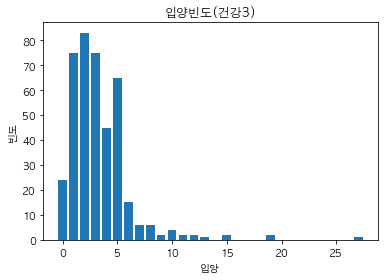

In [53]:
# 건강 상태에 따른 입양
frequency = train.loc[train.AdoptionSpeed == 0, :].PhotoAmt.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

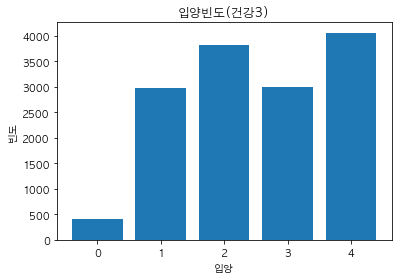

In [73]:
# 건강 상태에 따른 입양
frequency = train.loc[train.PhotoAmt <= 10, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

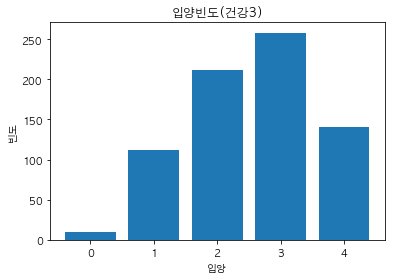

In [72]:
# 건강 상태에 따른 입양
frequency = train.loc[train.PhotoAmt > 10, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

In [74]:
train.VideoAmt.value_counts(ascending=False)

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

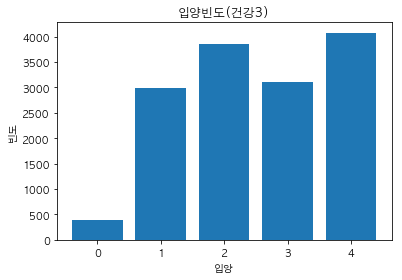

In [76]:
frequency = train.loc[train.VideoAmt == 0, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

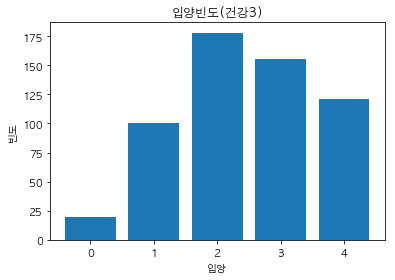

In [78]:
frequency = train.loc[train.VideoAmt != 0, :].AdoptionSpeed.value_counts() # 빈도 기준 내림차순으로 결과 저장
plt.bar(frequency.index, frequency)
plt.title("입양빈도(건강3)")
plt.xlabel("입양")
plt.ylabel("빈도")
plt.show()

In [79]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_group,age_group2
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,"[0, 30)","[3, 6)"
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,"[0, 30)","[0, 3)"
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,"[0, 30)","[0, 3)"
3,1,Miko,4,307,0,2,1,2,0,2,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,"[0, 30)","[3, 6)"
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,"[0, 30)","[0, 3)"
